# Data Cleaning and Merging

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import
1. Import from data output from Data Source notebooks
2. Format data in preparation for merge
    - ACS and BRFSS have different conventions for county names in the data. 
    - Example: ACS has Aleutians East Borough, BRFSS has Aleutians East (AK)
    - Need to remove suffix terminology from ACS data
    - ACS has "City" and "city" areas and BRFSS has "city", "City" areas or "". If "city" is dropped, then duplicates will emerge like St. Louis county vs St. Louis city in Missouri. 
    - "County" is explicitly named in "name" for ACS but omitted in BRFSS. ACS also contains, borough, census area, municipality, and parish
    - Since county and state name are the only index in common to merge the datasets, these will have to be cleaned for the best merge. 

In [1]:
# import os
# # change directory for your path
# os.chdir('PATH')

In [4]:
a = pd.read_csv('acs5y_2021_all.csv')
b = pd.read_csv('BRFSS.csv')

a = a[a['name'].str.contains('Puerto Rico') == False]
#Dropping Florida due to not not having data for 2021 BRFSS
a = a[a['name'].str.contains('Florida') == False]

In [5]:
a['county'] = a['name'].str.split(',').str[0]
a['county'] = a['county'].str.replace(' County', '', regex=False).str.strip()

a['state'] = a['name'].str.split(',').str[1]

b['county'] = b['locationname']
b['state'] = b['statedesc']

a.drop(['name'], axis=1, inplace=True)
b.drop(['locationname', 'statedesc','stateabbr'], axis=1, inplace=True)

a['state'] = a['state'].str.strip()
b['state'] = b['state'].str.strip()

a['county'] = a['county'].str.strip()
b['county'] = b['county'].str.strip()

display(a.head())
display(b.head())

,state,county,pop_tot,pop_25,pop_lf,hh_tot,ed_lt9,ed_9_12,ed_hs,ed_sc,ed_asc,ed_b,ed_gr,m_ed_lt9,m_ed_9_12,m_ed_hs,m_ed_sc,m_ed_asc,m_ed_b,m_ed_gr,age_gte65,m_age_gte65,race_white,race_black,race_aian,race_asian,race_nhopi,race_other,m_race_white,m_race_black,m_race_aian,m_race_asian,m_race_nhopi,m_race_other,eth_hisp,m_eth_hisp,sex_male,sex_female,m_sex_male,m_sex_female,occ_unemp,occ_mgt,occ_svc,occ_sales,occ_nat_res,occ_prod,m_occ_unemp,m_occ_mgt,m_occ_svc,m_occ_sales,m_occ_nat_res,m_occ_prod,hlth_unins,m_hlth_unins,pct_ses_pov,tp_veh_0,tp_veh_1,tp_veh_2,tp_veh_3,m_tp_veh_0,m_tp_veh_1,m_tp_veh_2,m_tp_veh_3,dg_bb_int,m_dg_bb_int,age_gte65_lower,age_gte65_upper,race_white_lower,race_white_upper,race_black_lower,race_black_upper,race_aian_lower,race_aian_upper,race_asian_lower,race_asian_upper,race_nhopi_lower,race_nhopi_upper,race_other_lower,race_other_upper,hlth_unins_lower,hlth_unins_upper,sex_male_lower,sex_male_upper,sex_female_lower,sex_female_upper,ed_lt9_lower,ed_lt9_upper,ed_9_12_lower,ed_9_12_upper,ed_hs_lower,ed_hs_upper,ed_sc_lower,ed_sc_upper,ed_asc_lower,ed_asc_upper,ed_b_lower,ed_b_upper,ed_gr_lower,ed_gr_upper,occ_unemp_lower,occ_unemp_upper,occ_mgt_lower,occ_mgt_upper,eth_hisp_lower,eth_hisp_upper,occ_svc_lower,occ_svc_upper,occ_sales_lower,occ_sales_upper,occ_nat_res_lower,occ_nat_res_upper,occ_prod_lower,occ_prod_upper,tp_veh_0_lower,tp_veh_0_upper,tp_veh_1_lower,tp_veh_1_upper,tp_veh_2_lower,tp_veh_2_upper,tp_veh_3_lower,tp_veh_3_upper,dg_bb_int_lower,dg_bb_int_upper,pct_age_gte65_lower,pct_age_gte65,pct_age_gte65_upper,pct_race_white_lower,pct_race_white,pct_race_white_upper,pct_race_black_lower,pct_race_black,pct_race_black_upper,pct_race_aian_lower,pct_race_aian,pct_race_aian_upper,pct_race_asian_lower,pct_race_asian,pct_race_asian_upper,pct_race_nhopi_lower,pct_race_nhopi,pct_race_nhopi_upper,pct_race_other_lower,pct_race_other,pct_race_other_upper,pct_hlth_unins_lower,pct_hlth_unins,pct_hlth_unins_upper,pct_sex_male_lower,pct_sex_male,pct_sex_male_upper,pct_sex_female_lower,pct_sex_female,pct_sex_female_upper,pct_ed_lt9_lower,pct_ed_lt9,pct_ed_lt9_upper,pct_ed_9_12_lower,pct_ed_9_12,pct_ed_9_12_upper,pct_ed_hs_lower,pct_ed_hs,pct_ed_hs_upper,pct_ed_sc_lower,pct_ed_sc,pct_ed_sc_upper,pct_ed_asc_lower,pct_ed_asc,pct_ed_asc_upper,pct_ed_b_lower,pct_ed_b,pct_ed_b_upper,pct_ed_gr_lower,pct_ed_gr,pct_ed_gr_upper,pct_tp_veh_0_lower,pct_tp_veh_0,pct_tp_veh_0_upper,pct_tp_veh_1_lower,pct_tp_veh_1,pct_tp_veh_1_upper,pct_tp_veh_2_lower,pct_tp_veh_2,pct_tp_veh_2_upper,pct_tp_veh_3_lower,pct_tp_veh_3,pct_tp_veh_3_upper,pct_dg_bb_int_lower,pct_dg_bb_int,pct_dg_bb_int_upper,pct_occ_unemp_lower,pct_occ_unemp,pct_occ_unemp_upper,pct_occ_mgt_lower,pct_occ_mgt,pct_occ_mgt_upper,pct_eth_hisp_lower,pct_eth_hisp,pct_eth_hisp_upper,pct_occ_svc_lower,pct_occ_svc,pct_occ_svc_upper,pct_occ_sales_lower,pct_occ_sales,pct_occ_sales_upper,pct_occ_nat_res_lower,pct_occ_nat_res,pct_occ_nat_res_upper,pct_occ_prod_lower,pct_occ_prod,pct_occ_prod_upper
0,Alabama,Autauga,58239,39614.0,25871,21856.0,803.0,3323.0,12977.0,7774.0,3593.0,6507.0,4637.0,237.0,444.0,866.0,805.0,551.0,703.0,573.0,8815,92.0,43755,11470,98,647,0,196,311,309,85,206,30,181,1775,NaN,28206,30033,213.0,213.0,752,9850,3898,5656,2460,4007,215,873,483,612,384,469,4496,706,13.6,1182,6891,7383,6400,282,606,522,537,18679.0,477.0,8723.0,8907.0,43444,44066,11161,11779,13,183,441,853,-30,30,15,377,3790,5202,27993.0,28419.0,29820.0,30246.0,566.0,1040.0,2879.0,3767.0,12111.0,13843.0,6969.0,8579.0,3042.0,4144.0,5804.0,7210.0,4064.0,5210.0,537,967,8977,10723,NaN,NaN,3415,4381,5044,6268,2076,2844,3538,4476,900,1464,6285,7497,6861,7905,5863,6937,18202.0,19156.0,0.149779,0.151359,0.152939,0.745961,0.751301,0.756641,0.191641,0.196947,0.202253,0.000223,0.001683,0.003142,0.007572,0.011109,0.014647,-0.000515,0.000000,0.000515,0.000258,0.003365,0.006473,0.065077,0.077199,0.089322,0.480657,0.484315,0.487972,0.512028,0.515685,0.519343,0.014288,0.020271,0.026253,0.072676,0.083884,0.095093,0.3

,totalpopulation,brfss_access2_ageadjprv,brfss_access2_crdprv,brfss_checkup_ageadjprv,brfss_checkup_crdprv,brfss_csmoking_ageadjprv,brfss_csmoking_crdprv,brfss_depression_ageadjprv,brfss_depression_crdprv,brfss_diabetes_ageadjprv,brfss_diabetes_crdprv,brfss_ghlth_ageadjprv,brfss_ghlth_crdprv,brfss_mhlth_ageadjprv,brfss_mhlth_crdprv,brfss_obesity_ageadjprv,brfss_obesity_crdprv,brfss_access2_ageadjprv_lower,brfss_access2_ageadjprv_upper,brfss_access2_crdprv_lower,brfss_access2_crdprv_upper,brfss_checkup_ageadjprv_lower,brfss_checkup_ageadjprv_upper,brfss_checkup_crdprv_lower,brfss_checkup_crdprv_upper,brfss_csmoking_ageadjprv_lower,brfss_csmoking_ageadjprv_upper,brfss_csmoking_crdprv_lower,brfss_csmoking_crdprv_upper,brfss_depression_ageadjprv_lower,brfss_depression_ageadjprv_upper,brfss_depression_crdprv_lower,brfss_depression_crdprv_upper,brfss_diabetes_ageadjprv_lower,brfss_diabetes_ageadjprv_upper,brfss_diabetes_crdprv_lower,brfss_diabetes_crdprv_upper,brfss_ghlth_ageadjprv_lower,brfss_ghlth_ageadjprv_upper,brfss_ghlth_crdprv_lower,brfss_ghlth_crdprv_upper,brfss_mhlth_ageadjprv_lower,brfss_mhlth_ageadjprv_upper,brfss_mhlth_crdprv_lower,brfss_mhlth_crdprv_upper,brfss_obesity_ageadjprv_lower,brfss_obesity_ageadjprv_upper,brfss_obesity_crdprv_lower,brfss_obesity_crdprv_upper,county,state
0,3398,16.9,16.5,60.7,60.7,18.6,19.3,13.1,13.0,12.6,13.1,19.1,19.2,12.9,12.7,31.3,32.1,13.8,20.3,13.4,19.6,54.6,66.8,54.5,66.8,15.6,22.3,16.1,23.1,10.6,15.9,10.5,15.8,10.8,14.6,11.3,15.1,16.6,22.0,16.8,22.2,11.2,14.9,11.0,14.7,24.5,38.7,25.2,39.5,Aleutians East,Alaska
1,5059,13.7,13.4,61.6,60.6,15.5,16.7,13.4,13.5,10.9,10.8,15.3,15.0,12.2,12.2,30.3,31.6,11.5,16.2,11.2,15.9,56.2,67.9,55.1,67.1,13.0,18.5,14.0,19.9,11.1,16.5,11.2,16.5,9.4,12.6,9.3,12.6,13.3,17.4,13.0,17.2,10.7,14.1,10.7,14.0,24.8,37.6,25.9,39.0,Aleutians West,Alaska
2,288121,10.4,10.3,62.9,62.7,14.9,15.0,19.5,19.7,7.8,7.9,13.5,13.5,14.5,14.6,32.9,33.0,8.5,12.7,8.5,12.6,58.9,66.6,58.7,66.4,12.3,17.7,12.4,17.7,17.1,22.1,17.3,22.4,6.8,8.9,6.9,9.0,11.7,15.6,11.7,15.5,12.8,16.3,12.9,16.4,29.0,37.0,29.1,37.1,Anchorage,Alaska
3,18557,19.2,19.1,62.6,61.2,35.4,35.5,21.2,21.9,15.9,14.8,30.0,29.0,21.4,22.4,43.1,42.8,15.2,23.4,15.0,23.5,57.1,67.6,55.7,66.4,29.9,40.7,29.7,40.7,17.7,25.1,18.3,26.0,13.8,18.1,12.7,16.8,26.1,34.2,25.0,33.1,18.6,24.2,19.4,25.3,36.3,49.7,35.9,49.4,Bethel,Alaska
4,838,10.3,9.8,61.4,64.2,18.7,18.8,18.8,18.1,8.6,10.7,14.4,15.9,15.4,14.4,35.6,36.4,8.4,12.4,8.1,11.8,55.4,66.9,58.4,69.5,15.3,22.1,15.5,22.3,15.5,22.6,14.9,21.8,7.3,10.1,9.1,12.6,12.4,16.6,13.7,18.3,13.4,17.6,12.5,16.5,28.5,42.9,29.3,43.9,Bristol Bay,Alaska


In [6]:
_a = a.copy()
_b = b.copy()

#independent cities have case sensitive names
independent_cities_a=[
            'Baltimore city', 'St. Louis city','Carson City','Charles City',
            'Fairfax city', 'Franklin city', 'James City','Richmond city', 'Roanoke city'
]
independent_cities_b=[
            'Baltimore City', 'St. Louis City','Carson City','Charles City',
            'Fairfax City', 'Franklin City', 'James City','Richmond City', 'Roanoke City'
]

#for independent cities matches in county columns for both datasets, replace City with Cty
_a['county'] = _a.apply(lambda row: row['county'].replace(' City', ' Cty') if row['county'] in independent_cities_a else row['county'], axis=1)
_a['county'] = _a.apply(lambda row: row['county'].replace(' city', ' Cty') if row['county'] in independent_cities_a else row['county'], axis=1)
_b['county'] = _b.apply(lambda row: row['county'].replace(' City', ' Cty') if row['county'] in independent_cities_b else row['county'], axis=1)

#Parish for Louisiana and city for city-counties
_a['county'] = _a.apply(lambda row: row['county'].replace(' Parish', '') if row['state'] == 'Louisiana' else row['county'], axis=1)
_a['county'] = _a['county'].str.replace(' city', '', regex=False)

#Alaska
_a['county'] = _a.apply(lambda row: row['county'].replace(' Census Area', '') if row['state'] == 'Alaska' else row['county'], axis=1)
_a['county'] = _a.apply(lambda row: row['county'].replace(' City and Borough', '') if row['state'] == 'Alaska' else row['county'], axis=1)
_a['county'] = _a.apply(lambda row: row['county'].replace(' Borough', '') if row['state'] == 'Alaska' else row['county'], axis=1)
_a['county'] = _a.apply(lambda row: row['county'].replace(' Municipality', '') if row['state'] == 'Alaska' else row['county'], axis=1)


#non standard character in New Mexico
_b['county'] = _b['county'].replace('DoÃ±a Ana', 'Doña Ana')
_a['county'] = _a['county'].replace('DoÃ±a Ana', 'Doña Ana')

#merge by county and state
merged = pd.merge(_b, _a, on=['county', 'state'], how='left')
display(_a.shape)
display(_b.shape)
display(merged.shape)

(3076, 210)

(3076, 51)

(3076, 259)

In [7]:
#check for duplicates, null, and nan values
display(merged.isnull().sum())
display(merged.isna().sum())
display(merged.duplicated().sum())

totalpopulation                        0
brfss_access2_ageadjprv                0
brfss_access2_crdprv                   0
brfss_checkup_ageadjprv                0
brfss_checkup_crdprv                   0
brfss_csmoking_ageadjprv               0
brfss_csmoking_crdprv                  0
brfss_depression_ageadjprv             0
brfss_depression_crdprv                0
brfss_diabetes_ageadjprv               0
brfss_diabetes_crdprv                  0
brfss_ghlth_ageadjprv                  0
brfss_ghlth_crdprv                     0
brfss_mhlth_ageadjprv                  0
brfss_mhlth_crdprv                     0
brfss_obesity_ageadjprv                0
brfss_obesity_crdprv                   0
brfss_access2_ageadjprv_lower          0
brfss_access2_ageadjprv_upper          0
brfss_access2_crdprv_lower             0
brfss_access2_crdprv_upper             0
brfss_checkup_ageadjprv_lower          0
brfss_checkup_ageadjprv_upper          0
brfss_checkup_crdprv_lower             0
brfss_checkup_cr

totalpopulation                        0
brfss_access2_ageadjprv                0
brfss_access2_crdprv                   0
brfss_checkup_ageadjprv                0
brfss_checkup_crdprv                   0
brfss_csmoking_ageadjprv               0
brfss_csmoking_crdprv                  0
brfss_depression_ageadjprv             0
brfss_depression_crdprv                0
brfss_diabetes_ageadjprv               0
brfss_diabetes_crdprv                  0
brfss_ghlth_ageadjprv                  0
brfss_ghlth_crdprv                     0
brfss_mhlth_ageadjprv                  0
brfss_mhlth_crdprv                     0
brfss_obesity_ageadjprv                0
brfss_obesity_crdprv                   0
brfss_access2_ageadjprv_lower          0
brfss_access2_ageadjprv_upper          0
brfss_access2_crdprv_lower             0
brfss_access2_crdprv_upper             0
brfss_checkup_ageadjprv_lower          0
brfss_checkup_ageadjprv_upper          0
brfss_checkup_crdprv_lower             0
brfss_checkup_cr

0

In [8]:
merged.head(10)

,totalpopulation,brfss_access2_ageadjprv,brfss_access2_crdprv,brfss_checkup_ageadjprv,brfss_checkup_crdprv,brfss_csmoking_ageadjprv,brfss_csmoking_crdprv,brfss_depression_ageadjprv,brfss_depression_crdprv,brfss_diabetes_ageadjprv,brfss_diabetes_crdprv,brfss_ghlth_ageadjprv,brfss_ghlth_crdprv,brfss_mhlth_ageadjprv,brfss_mhlth_crdprv,brfss_obesity_ageadjprv,brfss_obesity_crdprv,brfss_access2_ageadjprv_lower,brfss_access2_ageadjprv_upper,brfss_access2_crdprv_lower,brfss_access2_crdprv_upper,brfss_checkup_ageadjprv_lower,brfss_checkup_ageadjprv_upper,brfss_checkup_crdprv_lower,brfss_checkup_crdprv_upper,brfss_csmoking_ageadjprv_lower,brfss_csmoking_ageadjprv_upper,brfss_csmoking_crdprv_lower,brfss_csmoking_crdprv_upper,brfss_depression_ageadjprv_lower,brfss_depression_ageadjprv_upper,brfss_depression_crdprv_lower,brfss_depression_crdprv_upper,brfss_diabetes_ageadjprv_lower,brfss_diabetes_ageadjprv_upper,brfss_diabetes_crdprv_lower,brfss_diabetes_crdprv_upper,brfss_ghlth_ageadjprv_lower,brfss_ghlth_ageadjprv_upper,brfss_ghlth_crdprv_lower,brfss_ghlth_crdprv_upper,brfss_mhlth_ageadjprv_lower,brfss_mhlth_ageadjprv_upper,brfss_mhlth_crdprv_lower,brfss_mhlth_crdprv_upper,brfss_obesity_ageadjprv_lower,brfss_obesity_ageadjprv_upper,brfss_obesity_crdprv_lower,brfss_obesity_crdprv_upper,county,state,pop_tot,pop_25,pop_lf,hh_tot,ed_lt9,ed_9_12,ed_hs,ed_sc,ed_asc,ed_b,ed_gr,m_ed_lt9,m_ed_9_12,m_ed_hs,m_ed_sc,m_ed_asc,m_ed_b,m_ed_gr,age_gte65,m_age_gte65,race_white,race_black,race_aian,race_asian,race_nhopi,race_other,m_race_white,m_race_black,m_race_aian,m_race_asian,m_race_nhopi,m_race_other,eth_hisp,m_eth_hisp,sex_male,sex_female,m_sex_male,m_sex_female,occ_unemp,occ_mgt,occ_svc,occ_sales,occ_nat_res,occ_prod,m_occ_unemp,m_occ_mgt,m_occ_svc,m_occ_sales,m_occ_nat_res,m_occ_prod,hlth_unins,m_hlth_unins,pct_ses_pov,tp_veh_0,tp_veh_1,tp_veh_2,tp_veh_3,m_tp_veh_0,m_tp_veh_1,m_tp_veh_2,m_tp_veh_3,dg_bb_int,m_dg_bb_int,age_gte65_lower,age_gte65_upper,race_white_lower,race_white_upper,race_black_lower,race_black_upper,race_aian_lower,race_aian_upper,race_asian_lower,race_asian_upper,race_nhopi_lower,race_nhopi_upper,race_other_lower,race_other_upper,hlth_unins_lower,hlth_unins_upper,sex_male_lower,sex_male_upper,sex_female_lower,sex_female_upper,ed_lt9_lower,ed_lt9_upper,ed_9_12_lower,ed_9_12_upper,ed_hs_lower,ed_hs_upper,ed_sc_lower,ed_sc_upper,ed_asc_lower,ed_asc_upper,ed_b_lower,ed_b_upper,ed_gr_lower,ed_gr_upper,occ_unemp_lower,occ_unemp_upper,occ_mgt_lower,occ_mgt_upper,eth_hisp_lower,eth_hisp_upper,occ_svc_lower,occ_svc_upper,occ_sales_lower,occ_sales_upper,occ_nat_res_lower,occ_nat_res_upper,occ_prod_lower,occ_prod_upper,tp_veh_0_lower,tp_veh_0_upper,tp_veh_1_lower,tp_veh_1_upper,tp_veh_2_lower,tp_veh_2_upper,tp_veh_3_lower,tp_veh_3_upper,dg_bb_int_lower,dg_bb_int_upper,pct_age_gte65_lower,pct_age_gte65,pct_age_gte65_upper,pct_race_white_lower,pct_race_white,pct_race_white_upper,pct_race_black_lower,pct_race_black,pct_race_black_upper,pct_race_aian_lower,pct_race_aian,pct_race_aian_upper,pct_race_asian_lower,pct_race_asian,pct_race_asian_upper,pct_race_nhopi_lower,pct_race_nhopi,pct_race_nhopi_upper,pct_race_other_lower,pct_race_other,pct_race_other_upper,pct_hlth_unins_lower,pct_hlth_unins,pct_hlth_unins_upper,pct_sex_male_lower,pct_sex_male,pct_sex_male_upper,pct_sex_female_lower,pct_sex_female,pct_sex_female_upper,pct_ed_lt9_lower,pct_ed_lt9,pct_ed_lt9_upper,pct_ed_9_12_lower,pct_ed_9_12,pct_ed_9_12_upper,pct_ed_hs_lower,pct_ed_hs,pct_ed_hs_upper,pct_ed_sc_lower,pct_ed_sc,pct_ed_sc_upper,pct_ed_asc_lower,pct_ed_asc,pct_ed_asc_upper,pct_ed_b_lower,pct_ed_b,pct_ed_b_upper,pct_ed_gr_lower,pct_ed_gr,pct_ed_gr_upper,pct_tp_veh_0_lower,pct_tp_veh_0,pct_tp_veh_0_upper,pct_tp_veh_1_lower,pct_tp_veh_1,pct_tp_veh_1_upper,pct_tp_veh_2_lower,pct_tp_veh_2,pct_tp_veh_2_upper,pct_tp_veh_3_lower,pct_tp_veh_3,pct_tp_veh_3_upper,pct_dg_bb_int_lower,pct_dg_bb_int,pct_dg_bb_int_upper,pct_occ_unemp_lower,pct_occ_unemp,pct_occ_unemp_upper,pct_occ_mgt_lower,pc

# Validation
- Total Population in common between both datasets, plot variance to check for outliers


In [9]:
val = merged.copy()

In [10]:
val['variance_pop'] = val['totalpopulation'] - val['pop_tot']

<Axes: title={'center': 'Variance of Population'}, ylabel='Frequency'>

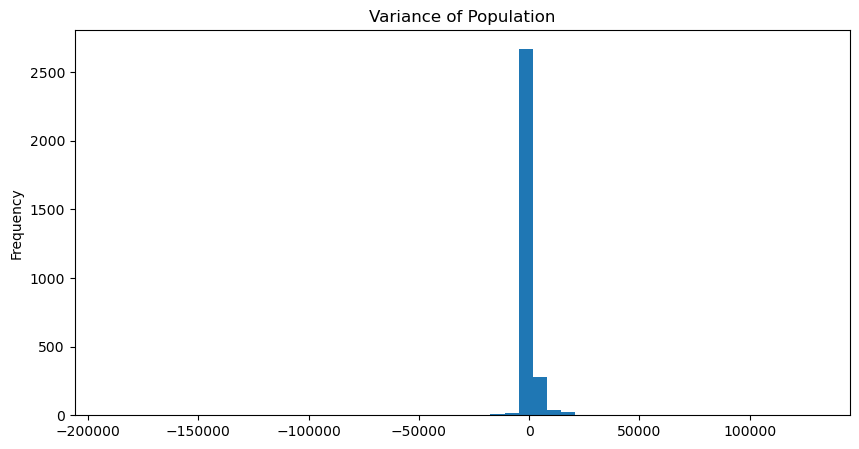

In [11]:
#plot variance pop
val['variance_pop'].plot(kind='hist', bins=50, figsize=(10,5), title='Variance of Population')

In [12]:
val = val[['variance_pop','county','state']].copy()

#display extreme values by row
display(val.sort_values(by=['variance_pop'], ascending=True).head(10))
display(val.sort_values(by=['variance_pop'], ascending=False).head(10))

,variance_pop,county,state
205,-190091,Los Angeles,California
643,-92252,Cook,Illinois
1945,-92251,New York,New York
1938,-71308,Kings,New York
1955,-61961,Queens,New York
224,-50732,San Francisco,California
229,-46514,Santa Clara,California
1917,-43314,Bronx,New York
227,-24600,San Mateo,California
187,-24577,Alameda,California


,variance_pop,county,state
179,129402,Maricopa,Arizona
2499,69650,Collin,Texas
1900,61329,Clark,Nevada
2518,56635,Denton,Texas
2535,52030,Fort Bend,Texas
2702,51267,Williamson,Texas
219,49064,Riverside,California
2626,40887,Montgomery,Texas
2471,37714,Bexar,Texas
2683,37359,Travis,Texas


In [13]:
#export to csv
merged.to_csv('acs5y_2021_brfss_2021_merged.csv', index=False, header=True)

c:\ProgramData\miniconda3\envs\ds_mf\lib\site-packages\pandas\core\internals\blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)
